# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
print(number_of_mice)

249


In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs with duplicates
unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()

# Display the list of unique duplicate Mouse IDs
unique_duplicate_mice


array(['g989'], dtype=object)

In [64]:
# Optional: Get all the data for the duplicate mouse ID. 

In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

copies = merged_data['Mouse ID'].isin(unique_duplicate_mice)

# Drop the rows
reduced_df = merged_data.drop(merged_data[copies].index)


reduced_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = reduced_df['Mouse ID'].nunique()
print(number_of_mice2)

248


## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_volume = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 
                              'Median Tumor Volume': median_tumor_volume, 
                              'Tumor Volume Variance': var_tumor_volume, 
                              'Tumor Volume Std. Dev.': std_tumor_volume, 
                              'Tumor Volume Std. Err.': sem_tumor_volume})

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats2 = reduced_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

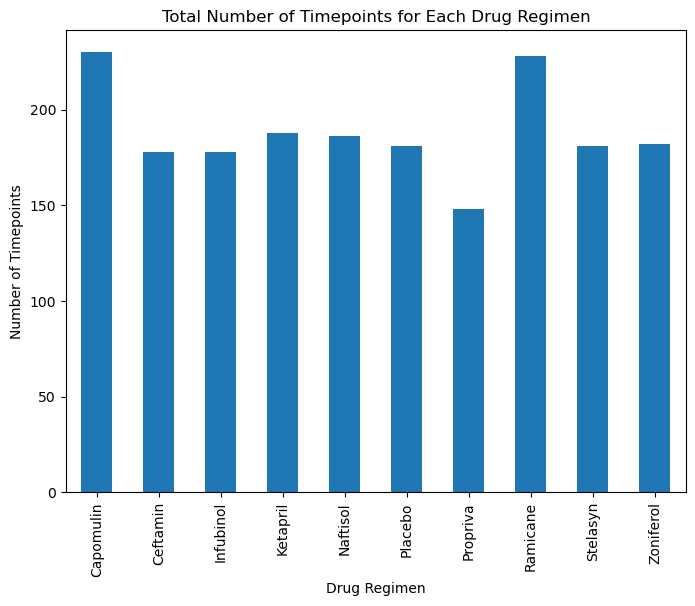

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_regimen = reduced_df.groupby('Drug Regimen')['Timepoint'].count()

timepoints_by_regimen.plot(kind='bar', figsize=(8,6))

# Set the x and y axis labels and the title of the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')

plt.show()


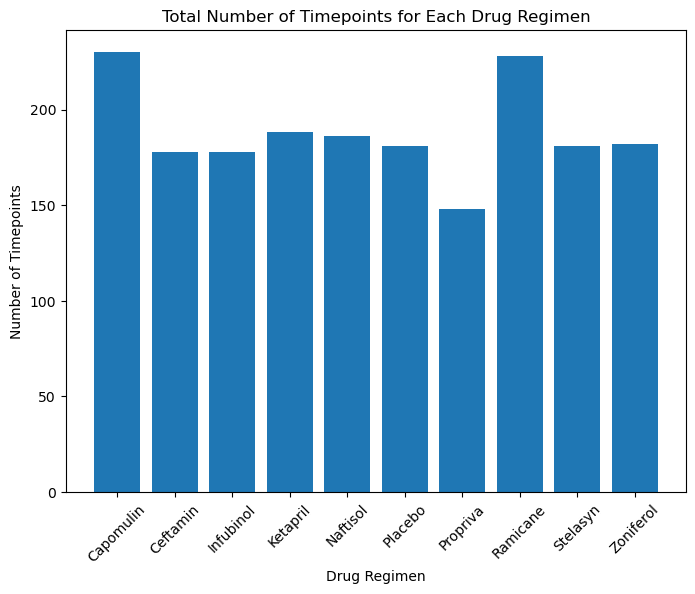

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_by_regimen = reduced_df.groupby('Drug Regimen')['Timepoint'].count()

# Get the list of drug regimens and the corresponding list of timepoints
drug_regimens = timepoints_by_regimen.index.tolist()
timepoints = timepoints_by_regimen.values.tolist()

# Create a bar plot of the total number of timepoints for each drug regimen
plt.figure(figsize=(8,6))
plt.bar(drug_regimens, timepoints)

# Set the x and y axis labels and the title of the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)

plt.show()

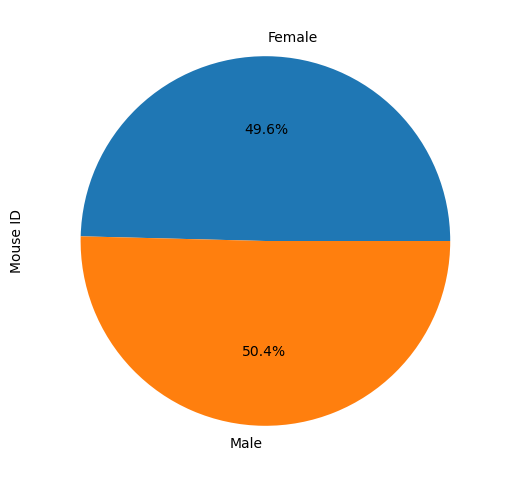

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = reduced_df.groupby('Sex')['Mouse ID'].nunique()

# Create a pie plot of the gender distribution using Pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=0, figsize=(6, 6))



# Display the plot
plt.show()

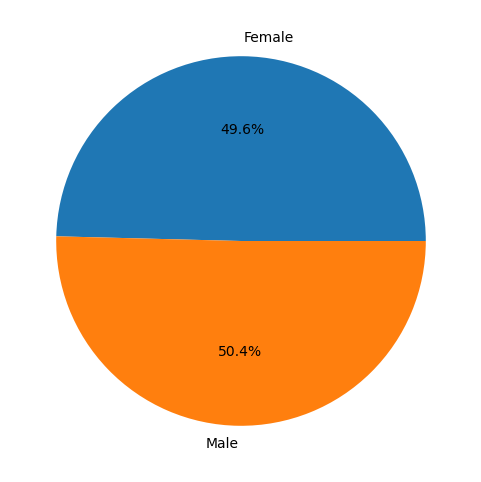

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = reduced_df.groupby('Sex')['Mouse ID'].nunique()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)

plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
timepoints = reduced_df.loc[reduced_df['Drug Regimen'].isin(regimens)].groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_final = pd.merge(reduced_df, timepoints, on=['Mouse ID', 'Timepoint'])

tumor_volume_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [86]:

drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each drug
tumor_vol_data = []

# Loop through the drugs of interest
for drug in drugs_of_interest:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes_drug = tumor_volume_final.loc[tumor_volume_final['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(final_tumor_volumes_drug)
    
    # Calculate quartiles, IQR, and bounds for potential outliers
    quartiles = final_tumor_volumes_drug.quantile([0.25,0.5,0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    # Print the results
    print(f"For {drug}")
    print(f"Values below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.\n")







For Capomulin
Values below 20.70 or above 51.83 could be outliers.

For Ramicane
Values below 17.91 or above 54.31 could be outliers.

For Infubinol
Values below 36.83 or above 82.74 could be outliers.

For Ceftamin
Values below 25.36 or above 87.67 could be outliers.



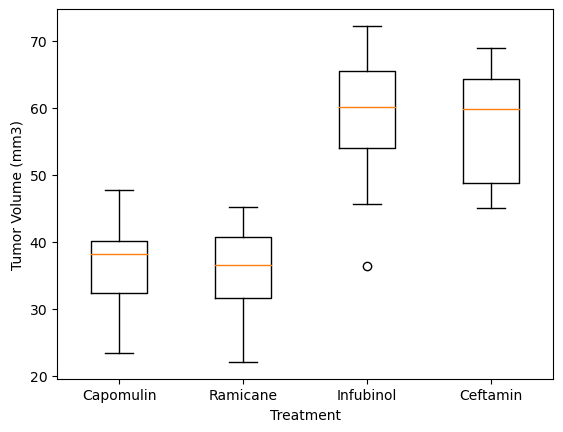

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Treatment')
plt.show()

## Line and Scatter Plots

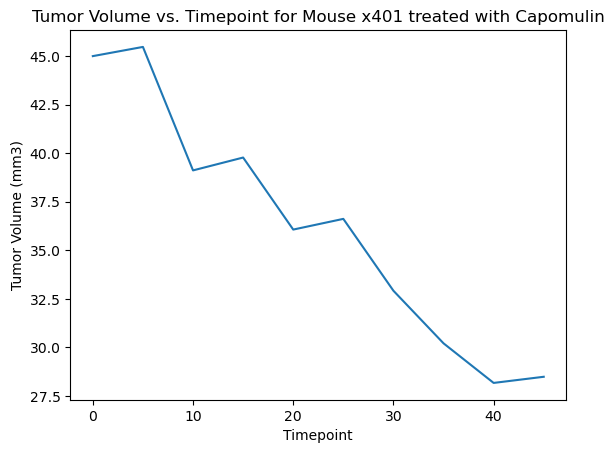

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = tumor_volume_final[tumor_volume_final['Drug Regimen'] == 'Capomulin']

mouse_id = 'x401'
mouse_data = reduced_df[reduced_df['Mouse ID'] == mouse_id]

fig, ax = plt.subplots()
ax.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
ax.set_xlabel('Timepoint')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} treated with Capomulin')
plt.show()

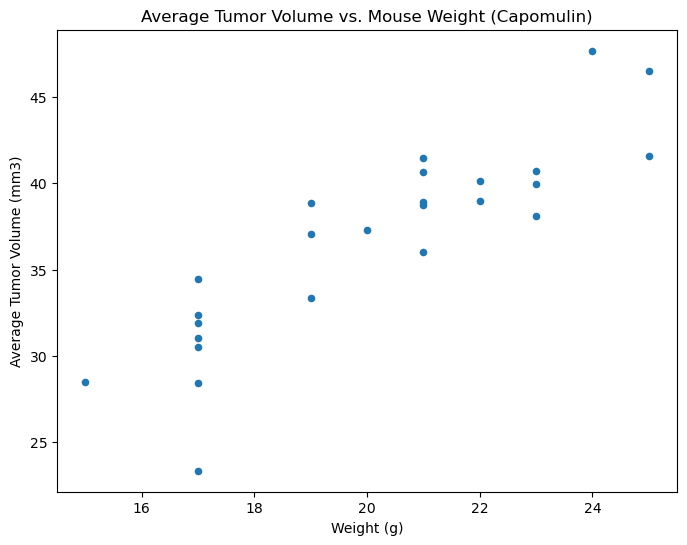

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_stats = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
capomulin_stats.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight (Capomulin)", figsize=(8,6))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

Correlation coefficient: 0.876706040365812


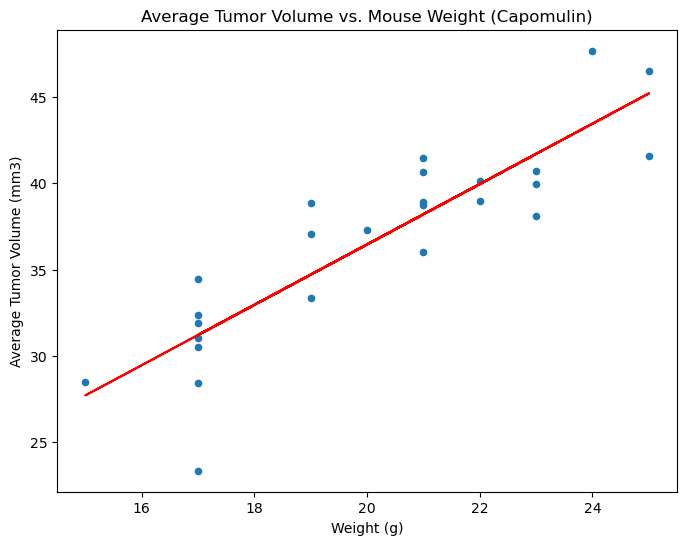

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#I know for a fact I overcomplicated some of this

avg_tumor_vol = capomulin_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby(['Mouse ID'])['Weight (g)'].mean()
correlation = np.corrcoef(mouse_weight, avg_tumor_vol)[0, 1]
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_vol)
print(f"Correlation coefficient: {correlation}")

capomulin_stats = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
capomulin_stats.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight (Capomulin)", figsize=(8,6))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean()
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.plot(x_values, regress_values, "r-")


plt.show()
